In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Melbourne_housing_FULL.xlsx')
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09 00:00:00,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12 00:00:00,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02 00:00:00,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,NaN
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02 00:00:00,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03 00:00:00,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03 00:00:00,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06 00:00:00,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08 00:00:00,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08 00:00:00,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08 00:00:00,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
print(df.shape)

(34857, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        7
dtype: int64

In [7]:
#drop columns
df.dropna(subset = ['Distance','Postcode','CouncilArea','Regionname','YearBuilt','Lattitude', 'Longtitude'], inplace = True)
df= df.drop(['Propertycount','SellerG','Address'], axis = 1)

In [8]:
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,2,h,1035000.0,S,2016-04-02 00:00:00,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,2017-04-03 00:00:00,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,VB,2016-04-06 00:00:00,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
7,Abbotsford,4,h,NaN,SN,2016-06-08 00:00:00,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan
8,Abbotsford,2,h,NaN,S,2016-06-08 00:00:00,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan


In [9]:
print('Categorical Features ')
print(df.select_dtypes(['object']).columns)

Categorical Features 
Index(['Suburb', 'Type', 'Method', 'Date', 'CouncilArea', 'Regionname'], dtype='object')


In [10]:
print('Numeric Features')
print(df.select_dtypes(['int64','float64']).columns)

Numeric Features
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')


In [11]:
#numerical variables
df['Price'].fillna((df['Price'].mean()), inplace = True)
df['Landsize'].fillna((df['Landsize'].mean()), inplace = True)
df['BuildingArea'].fillna((df['BuildingArea'].mean()), inplace = True)


In [12]:
#Catigorical variables
df['Bedroom2'].fillna((df['Bedroom2'].value_counts().index[0]), inplace = True)
df['Bathroom'].fillna((df['Bedroom2'].value_counts().index[0]), inplace = True)
df['Car'].fillna((df['Car'].value_counts().index[0]), inplace = True)

In [13]:
print(df.shape)

(15542, 18)


In [14]:
df.isnull().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Method          0
Date            0
Distance        0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Lattitude       0
Longtitude      0
Regionname      0
dtype: int64

In [15]:
print('Categorical Features ')
print(df.select_dtypes(['object']).columns)
print('Numeric Features')
df.select_dtypes(['int64','float64']).columns

Categorical Features 
Index(['Suburb', 'Type', 'Method', 'Date', 'CouncilArea', 'Regionname'], dtype='object')
Numeric Features


Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')

In [16]:
print(df.shape)

(15542, 18)


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,15542.0,3.108352e+00,0.986478,1.00000,2.0000,3.000000e+00,4.000000e+00,1.200000e+01
Price,15542.0,1.077469e+06,591866.464970,85000.00000,700000.0000,1.077469e+06,1.190000e+06,9.000000e+06
Distance,15542.0,1.115160e+01,6.944602,0.00000,6.3000,1.010000e+01,1.400000e+01,4.810000e+01
Postcode,15542.0,3.117065e+03,115.185764,3000.00000,3047.0000,3.101000e+03,3.155000e+03,3.978000e+03
Bedroom2,15542.0,3.090207e+00,1.008730,0.00000,2.0000,3.000000e+00,4.000000e+00,3.000000e+01
Bathroom,15542.0,1.670313e+00,0.735133,0.00000,1.0000,2.000000e+00,2.000000e+00,1.200000e+01
Car,15542.0,1.708532e+00,0.993501,0.00000,1.0000,2.000000e+00,2.000000e+00,2.600000e+01
Landsize,15542.0,5.315662e+02,989.417250,0.00000,231.0000,5.315662e+02,6.420000e+02,4.280000e+04
BuildingArea,15542.0,1.539193e+02,82.098538,0.00000,108.0000,1.500000e+02,1.750000e+02,3.112000e+03
YearBuilt,15542.0,1.965281e+03,37.316407,1196.00000,1940.0000,1.970000e+03,2.000000e+03,2.106000e+03


In [18]:
unique_Bedroom2= df['Bedroom2'].unique()
print("The Unique values in Bedroom2 are :" ,unique_Bedroom2)

The Unique values in Bedroom2 are : [ 2.  3.  4.  6.  1.  5.  9.  7.  0. 30.  8. 10. 12.]


In [19]:
unique_Bathroom= df['Bathroom'].unique()
print("The Unique values in Bathroom are :" ,unique_Bathroom)

The Unique values in Bathroom are : [ 1.  2.  3.  4.  7.  5. 12.  0.  6.  8.  9.]


In [20]:
unique_Type= df['Type'].unique()
print("The Unique values in Type are :" ,unique_Type)

The Unique values in Type are : ['h' 'u' 't']


In [21]:
unique_Method= df['Method'].unique()
print("The Unique values in Method are :" ,unique_Method)

The Unique values in Method are : ['S' 'SP' 'VB' 'SN' 'PI' 'W' 'PN' 'SA' 'SS']


In [22]:
df = df.drop(['Bedroom2'], axis=1)

In [23]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Date', 'Distance',
       'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

C:\Users\VINNY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

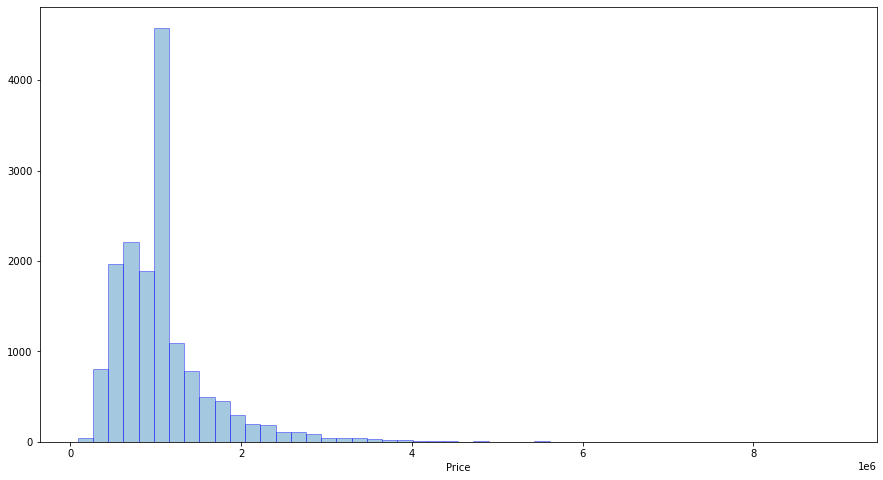

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(df['Price'], kde = False,hist_kws=dict(edgecolor="b"))

Text(0.5, 1.0, 'Correlation of features')

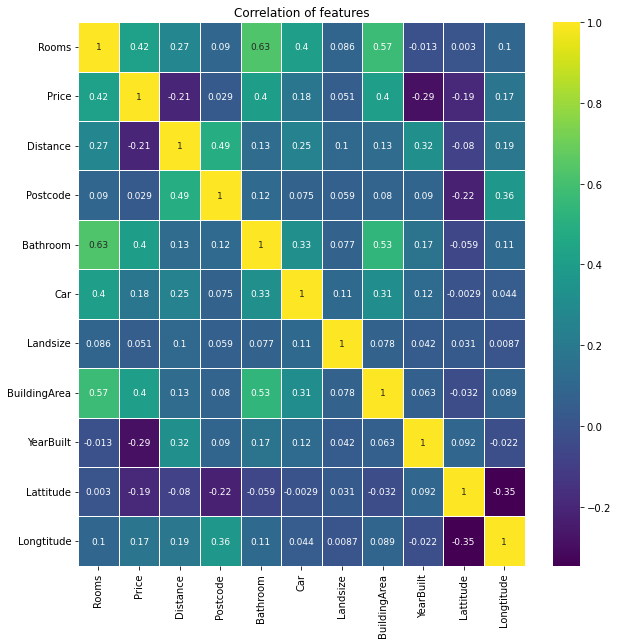

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'viridis', linewidth =1, annot=True, annot_kws = {'size':9})
plt.title('Correlation of features')

In [26]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Date', 'Distance',
       'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

Ploting categorical Features with Price

Text(0.5, 1.0, 'Method vs Price')

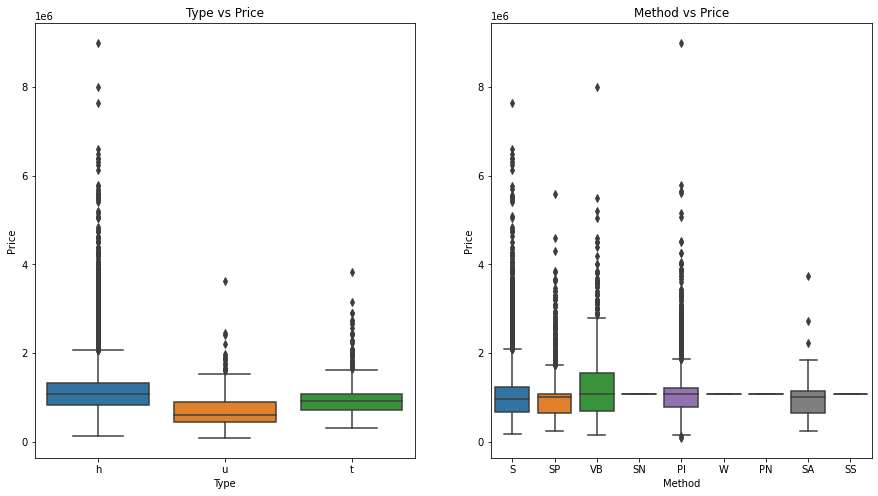

In [27]:
plt.figure(figsize =(15,8))

ax1 = plt.subplot(1,2,1)
sns.boxplot(data=df, x='Type', y='Price')
ax1.set_xlabel('Type')
ax1.set_ylabel('Price')
ax1.set_title('Type vs Price')

ax2 = plt.subplot(1,2,2,sharey=ax1)
sns.boxplot(data=df, x='Method', y='Price')
ax2.set_xlabel('Method')
ax2.set_ylabel('Price')
ax2.set_title('Method vs Price')

Plotting numeric variables

<function seaborn.rcmod.set(*args, **kwargs)>

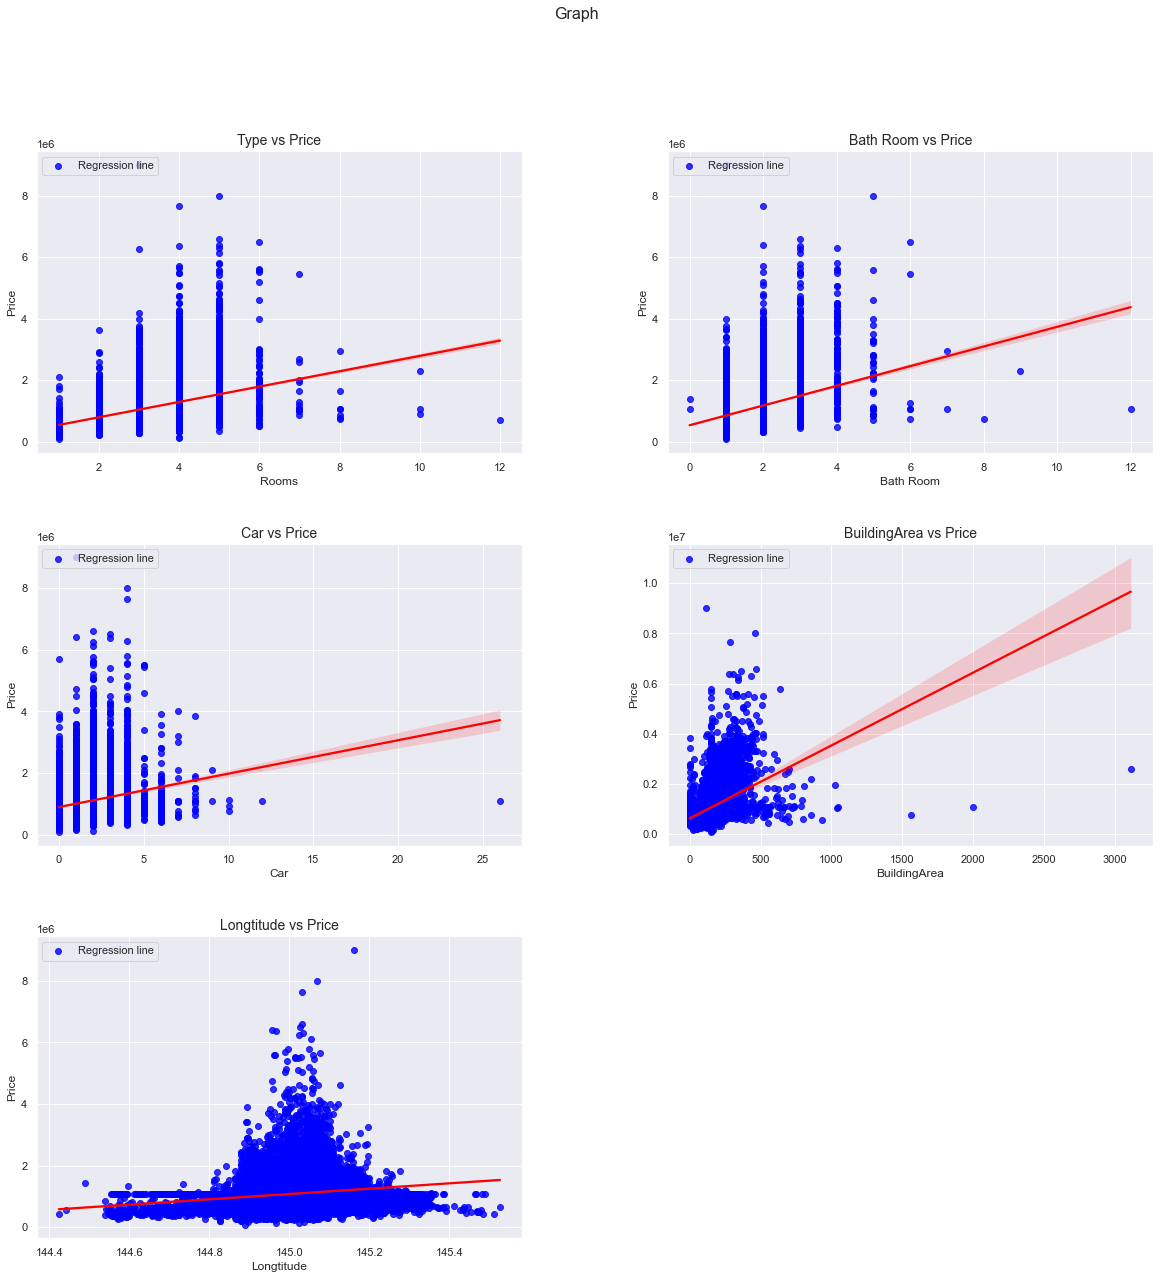

In [28]:
sns.set_style('darkgrid')
sns.set(font_scale=1)

plt.figure(figsize=(20, 20))
plt.suptitle('Graph', fontsize=16)

ax1 = plt.subplot(3, 2, 1)
sns.regplot(data=df, x='Rooms', y='Price', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax1.set_xlabel('Rooms')
ax1.set_ylabel('Price')
ax1.set_title('Type vs Price', fontsize=14)

ax2 = plt.subplot(3, 2, 2)
sns.regplot(data=df, x='Bathroom', y='Price', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax2.set_xlabel('Bath Room')
ax2.set_ylabel('Price')
ax2.set_title('Bath Room vs Price', fontsize=14)

ax3 = plt.subplot(3, 2, 3)
sns.regplot(data=df, x='Car', y='Price', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set_xlabel('Car')
ax3.set_ylabel('Price')
ax3.set_title('Car vs Price', fontsize=14)

ax4 = plt.subplot(3, 2, 4)
sns.regplot(data=df, x='BuildingArea', y='Price', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax4.set_xlabel('BuildingArea')
ax4.set_ylabel('Price')
ax4.set_title('BuildingArea vs Price', fontsize=14)

ax5 = plt.subplot(3, 2, 5)
sns.regplot(data=df, x='Longtitude', y='Price', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax5.set_xlabel('Longtitude')
ax5.set_ylabel('Price')
ax5.set_title('Longtitude vs Price', fontsize=14)

# Add a legend to the plot
ax1.legend(['Regression line'], loc='upper left')
ax2.legend(['Regression line'], loc='upper left')
ax3.legend(['Regression line'], loc='upper left')
ax4.legend(['Regression line'], loc='upper left')
ax5.legend(['Regression line'], loc='upper left') 

# Adjust the spacing between subplots 
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Change the color palette
sns.set


<AxesSubplot:ylabel='Price'>

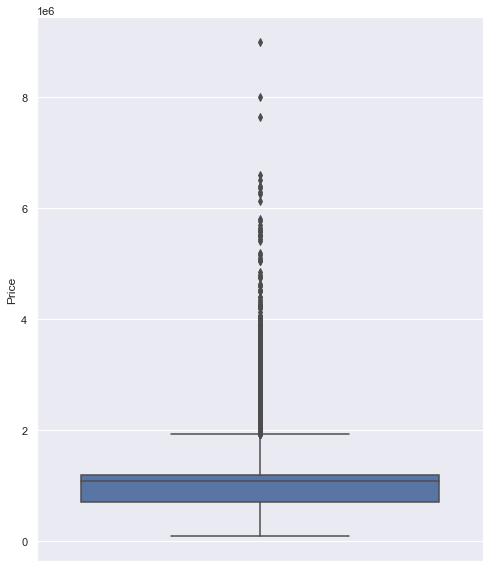

In [29]:
plt.figure(figsize=(8,10))
sns.boxplot(data = df, y='Price')

In [30]:
outliers = df[df['Price']>2500000]
outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,488.0,4.237705e+00,0.795813,2.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00
Price,488.0,3.268546e+06,869448.315223,2.504000e+06,2.700000e+06,2.995000e+06,3.502500e+06,9.000000e+06
Distance,488.0,7.804918e+00,3.260745,1.500000e+00,5.400000e+00,7.800000e+00,1.020000e+01,2.110000e+01
Postcode,488.0,3.134783e+03,43.531267,3.002000e+03,3.103000e+03,3.127000e+03,3.182000e+03,3.207000e+03
Bathroom,488.0,2.706967e+00,0.925452,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00
Car,488.0,2.278689e+00,1.132041,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
Landsize,488.0,7.372722e+02,462.043735,0.000000e+00,5.315662e+02,6.675000e+02,8.337500e+02,5.022000e+03
BuildingArea,488.0,2.752349e+02,165.969580,0.000000e+00,1.825000e+02,2.650000e+02,3.342500e+02,3.112000e+03
YearBuilt,488.0,1.946607e+03,45.790714,1.854000e+03,1.910000e+03,1.932000e+03,1.998000e+03,2.017000e+03
Lattitude,488.0,-3.784255e+01,0.045750,-3.798740e+01,-3.786540e+01,-3.783886e+01,-3.781150e+01,-3.773896e+01


In [31]:
maxfence_price = df[df['Price']==2500000]
maxfence_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,18.0,4.000000e+00,0.907485,3.000000e+00,3.000000e+00,4.000000e+00,4.750000e+00,6.000000e+00
Price,18.0,2.500000e+06,0.000000,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
Distance,18.0,8.216667e+00,3.231144,2.700000e+00,6.125000e+00,8.050000e+00,1.030000e+01,1.380000e+01
Postcode,18.0,3.139556e+03,54.584228,3.016000e+03,3.124750e+03,3.144500e+03,3.187000e+03,3.206000e+03
Bathroom,18.0,2.277778e+00,0.669113,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
Car,18.0,2.611111e+00,1.092159,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Landsize,18.0,6.851426e+02,277.471096,1.650000e+02,5.374247e+02,6.670000e+02,8.452500e+02,1.212000e+03
BuildingArea,18.0,2.078477e+02,63.118462,1.100000e+02,1.539193e+02,2.025000e+02,2.520000e+02,3.290000e+02
YearBuilt,18.0,1.940222e+03,40.568831,1.880000e+03,1.920000e+03,1.927500e+03,1.966500e+03,2.008000e+03
Lattitude,18.0,-3.785755e+01,0.053320,-3.794360e+01,-3.790426e+01,-3.785469e+01,-3.782395e+01,-3.774570e+01


In [32]:
#Remove item that has price that greater than 2.5M
df = df[df['Price']<=2500000]
print(df.shape)
df.describe().T

(15054, 17)


,count,mean,std,min,25%,50%,75%,max
Rooms,15054.0,3.071742e+00,0.970313,1.00000,2.000000,3.000000e+00,4.000000e+00,1.200000e+01
Price,15054.0,1.006442e+06,420147.688626,85000.00000,691000.000000,1.065000e+06,1.115000e+06,2.500000e+06
Distance,15054.0,1.126009e+01,7.005150,0.00000,6.300000,1.020000e+01,1.400000e+01,4.810000e+01
Postcode,15054.0,3.116490e+03,116.730762,3000.00000,3046.000000,3.101000e+03,3.153000e+03,3.978000e+03
Bathroom,15054.0,1.636708e+00,0.703039,0.00000,1.000000,2.000000e+00,2.000000e+00,1.200000e+01
Car,15054.0,1.690049e+00,0.983210,0.00000,1.000000,2.000000e+00,2.000000e+00,2.600000e+01
Landsize,15054.0,5.248980e+02,1001.179185,0.00000,226.000000,5.315662e+02,6.310000e+02,4.280000e+04
BuildingArea,15054.0,1.499867e+02,74.665349,0.00000,107.000000,1.470000e+02,1.700000e+02,2.002000e+03
YearBuilt,15054.0,1.965886e+03,36.853088,1196.00000,1947.000000,1.970000e+03,2.000000e+03,2.106000e+03
Lattitude,15054.0,-3.780839e+01,0.091069,-38.19043,-37.861175,-3.780540e+01,-3.775285e+01,-3.739020e+01


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15054 entries, 2 to 34856
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        15054 non-null  object 
 1   Rooms         15054 non-null  int64  
 2   Type          15054 non-null  object 
 3   Price         15054 non-null  float64
 4   Method        15054 non-null  object 
 5   Date          15054 non-null  object 
 6   Distance      15054 non-null  float64
 7   Postcode      15054 non-null  float64
 8   Bathroom      15054 non-null  float64
 9   Car           15054 non-null  float64
 10  Landsize      15054 non-null  float64
 11  BuildingArea  15054 non-null  float64
 12  YearBuilt     15054 non-null  float64
 13  CouncilArea   15054 non-null  object 
 14  Lattitude     15054 non-null  float64
 15  Longtitude    15054 non-null  float64
 16  Regionname    15054 non-null  object 
dtypes: float64(10), int64(1), object(6)
memory usage: 2.1+ MB


In [34]:
##create new dataset

new_data = df.copy()
new_data.drop(['Date','Suburb','Postcode','YearBuilt'],axis = 1, inplace = True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15054 entries, 2 to 34856
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         15054 non-null  int64  
 1   Type          15054 non-null  object 
 2   Price         15054 non-null  float64
 3   Method        15054 non-null  object 
 4   Distance      15054 non-null  float64
 5   Bathroom      15054 non-null  float64
 6   Car           15054 non-null  float64
 7   Landsize      15054 non-null  float64
 8   BuildingArea  15054 non-null  float64
 9   CouncilArea   15054 non-null  object 
 10  Lattitude     15054 non-null  float64
 11  Longtitude    15054 non-null  float64
 12  Regionname    15054 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.6+ MB


In [35]:
one_hot_encode_cols = new_data.dtypes[new_data.dtypes ==np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

print(new_data[one_hot_encode_cols].shape)
new_data[one_hot_encode_cols].head()

(15054, 4)


C:\Users\VINNY\AppData\Local\Temp\ipykernel_14556\4239906795.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = new_data.dtypes[new_data.dtypes ==np.object]


,Type,Method,CouncilArea,Regionname
2,h,S,Yarra City Council,Northern Metropolitan
4,h,SP,Yarra City Council,Northern Metropolitan
6,h,VB,Yarra City Council,Northern Metropolitan
7,h,SN,Yarra City Council,Northern Metropolitan
8,h,S,Yarra City Council,Northern Metropolitan


In [36]:
new_data = pd.get_dummies(new_data, columns = one_hot_encode_cols, drop_first = True)
new_data.describe(
).T

,count,mean,std,min,25%,50%,75%,max
Rooms,15054.0,3.071742e+00,0.970313,1.00000,2.000000,3.000000e+00,4.000000e+00,1.200000e+01
Price,15054.0,1.006442e+06,420147.688626,85000.00000,691000.000000,1.065000e+06,1.115000e+06,2.500000e+06
Distance,15054.0,1.126009e+01,7.005150,0.00000,6.300000,1.020000e+01,1.400000e+01,4.810000e+01
Bathroom,15054.0,1.636708e+00,0.703039,0.00000,1.000000,2.000000e+00,2.000000e+00,1.200000e+01
Car,15054.0,1.690049e+00,0.983210,0.00000,1.000000,2.000000e+00,2.000000e+00,2.600000e+01
Landsize,15054.0,5.248980e+02,1001.179185,0.00000,226.000000,5.315662e+02,6.310000e+02,4.280000e+04
BuildingArea,15054.0,1.499867e+02,74.665349,0.00000,107.000000,1.470000e+02,1.700000e+02,2.002000e+03
Lattitude,15054.0,-3.780839e+01,0.091069,-38.19043,-37.861175,-3.780540e+01,-3.775285e+01,-3.739020e+01
Longtitude,15054.0,1.449980e+02,0.121250,144.42379,144.928400,1.450032e+02,1.450688e+02,1.455264e+02
Type_t,15054.0,8.396439e-02,0.277344,0.00000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00


In [37]:
new_data.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Type_t,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1.035000e+06,2.5,1.0,0.0,156.0,79.000000,-37.8079,144.9934,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1.465000e+06,2.5,2.0,0.0,134.0,150.000000,-37.8093,144.9944,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1.600000e+06,2.5,1.0,2.0,120.0,142.000000,-37.8072,144.9941,0,...,0,1,0,0,1,0,0,0,0,0
7,4,1.077469e+06,2.5,2.0,2.0,400.0,220.000000,-37.7965,144.9965,0,...,0,1,0,0,1,0,0,0,0,0
8,2,1.077469e+06,2.5,1.0,2.0,201.0,153.919348,-37.7995,144.9974,0,...,0,1,0,0,1,0,0,0,0,0


In [38]:
X = new_data.drop('Price', axis=1)
y = new_data.Price
X.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Type_t,Type_u,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.5,1.0,0.0,156.0,79.000000,-37.8079,144.9934,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,2.0,0.0,134.0,150.000000,-37.8093,144.9944,0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,1.0,2.0,120.0,142.000000,-37.8072,144.9941,0,0,...,0,1,0,0,1,0,0,0,0,0
7,4,2.5,2.0,2.0,400.0,220.000000,-37.7965,144.9965,0,0,...,0,1,0,0,1,0,0,0,0,0
8,2,2.5,1.0,2.0,201.0,153.919348,-37.7995,144.9974,0,0,...,0,1,0,0,1,0,0,0,0,0


In [39]:
X =new_data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea']]

# Create target variable
y = new_data['Price']

In [40]:
def StandardScaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a

In [41]:
X=StandardScaler(X)
X

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea
2,-1.104568,-1.250563,-0.905681,-1.718966,-0.368476,-0.950763
4,-0.073939,-1.250563,0.516762,-1.718966,-0.390451,0.000178
6,0.956690,-1.250563,-0.905681,0.315254,-0.404434,-0.106970
7,0.956690,-1.250563,0.516762,0.315254,-0.124755,0.937726
8,-1.104568,-1.250563,-0.905681,0.315254,-0.323527,0.052672
...,...,...,...,...,...,...
34849,-0.073939,2.032845,0.516762,0.315254,-0.120760,0.107326
34850,-0.073939,2.032845,0.516762,0.315254,-0.256604,-0.200725
34853,-1.104568,-0.708087,0.516762,-0.701856,-0.426409,-0.615925
34854,-1.104568,-0.708087,-0.905681,0.315254,-0.304549,-0.401628


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train

array([[-0.07393912,  1.33333624,  0.51676247,  0.3152542 ,  0.00666066,
         0.05375221],
       [-1.1045683 , -0.72236264, -0.9056808 , -0.70185611,  0.00666066,
         0.05267199],
       [-0.07393912,  1.01927114, -0.9056808 ,  0.3152542 ,  0.05204241,
         0.05267199],
       ...,
       [-0.07393912, -0.30836773,  0.51676247, -0.70185611, -0.21565083,
         0.05267199],
       [-1.1045683 , -0.00857831, -0.9056808 , -0.70185611, -0.41841847,
         0.05267199],
       [-1.1045683 ,  0.10562718, -0.9056808 , -0.70185611, -0.52429714,
        -0.74986009]])

In [43]:
X.columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea'], dtype='object')

In [44]:
X_train.shape

(10537, 6)

In [45]:
X_test.shape

(4517, 6)

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [47]:
def cost_function(theta, X, y):
    # number of samples
    m = len(y)

  # predicted values
    y_hat = X @ theta

  # sum of squared differences
    cost = 1/(2*m) * np.sum((y_hat - y)**2)

    return cost

In [48]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # number of samples
    m = len(y)

    # empty array to store the cost at each iteration
    costs = []

    for i in range(num_iters):
        # predicted values
        y_hat = X @ theta
        
        # calculate the derivative of the cost function with respect to each model parameter
        derivative = X.T @ (y_hat - y) / m
    
        # update the model parameters
        theta = theta - alpha * derivative

        # calculate the cost
        cost = cost_function(theta, X, y)

        # store the cost at each iteration
        costs.append(cost)

    return theta, costs

In [49]:
class MultipleLinearRegression:
    
    def _init_(self):
        self.theta = None

    def fit(self, X, y, alpha, num_iters):
        # add a column of ones to X
        X = np.column_stack((np.ones(len(X)), X))
        
        
        # initialize the model parameters
        theta = np.zeros(X.shape[1])

        # run gradient descent
        theta, costs = gradient_descent(X, y, theta, alpha, num_iters)

        # store the model parameters
        self.theta = theta

    def predict(self, X):
        # add a column of ones to X
        X = np.column_stack((np.ones(len(X)), X))

        # make predictions using the model parameters
        y_hat = X @ self.theta

        return y_hat

# create a MultipleLinearRegression object
model = MultipleLinearRegression()

# fit the model to the data
model.fit(X_train,y_train, alpha=0.1, num_iters=100)

# make predictions using the model
y_pred = model.predict(X_test)

In [50]:
y_pred

array([ 860696.05993653,  733690.29708681,  805884.15541026, ...,
        777561.7451416 , 1114324.06887475,  778931.36472983])

In [51]:
def r2(y_test,y_pred): 
    n=len(y_test)
    mean=y_test.mean()
    sum_of_sqmean=0
    sum_of_sqerror=0
    for i in range(n):
        sum_of_sqmean+=(y_test[i]-mean)**2
        sum_of_sqerror+=(abs(y_test[i]-y_pred[i]))**2
    return (1-(sum_of_sqerror/sum_of_sqmean))*100

In [52]:
r2(y_test,y_pred)

30.20791075329845

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
import pickle

In [65]:
filename = 'model.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [66]:
filename = 'trained1_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [67]:
loaded_model = pickle.load(open('trained1_model.pkl', 'rb'))

In [68]:
X =new_data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea']]

# Create target variable
y = new_data['Price']

In [69]:
new_data = new_data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea','Price']]

In [70]:
df = new_data.iloc[:10]

In [71]:
df.shape

(10, 7)

In [72]:
df.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
2,2,2.5,1.0,0.0,156.0,79.000000,1.035000e+06
4,3,2.5,2.0,0.0,134.0,150.000000,1.465000e+06
6,4,2.5,1.0,2.0,120.0,142.000000,1.600000e+06
7,4,2.5,2.0,2.0,400.0,220.000000,1.077469e+06
8,2,2.5,1.0,2.0,201.0,153.919348,1.077469e+06


In [73]:
df.to_csv("df.csv")